In [28]:
#menginput library 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [44]:
customers = pd.read_csv('Mall_Customers.csv')
#input data ke dalam notebook

customers.head()
#melihat data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
customers.describe()
#Kita melihat penjelasan data secara statistik deskriptif 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [46]:
customers.shape
#melihat bentuk dari data yang terdiri dari 200 baris dan 5 kolom

(200, 5)

In [47]:
customers.dtypes
#melihat tipe dari data tersebut

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [48]:
customers.isnull().sum()
#melihat apakah terdapat null atau tidak

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0.5, 1.0, 'Distribusi Gender')

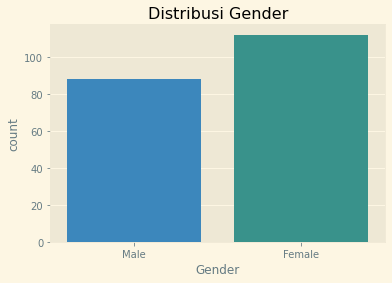

In [49]:
sns.countplot(x='Gender', data=customers)
plt.style.use('Solarize_Light2') #memilih style plot
plt.title('Distribusi Gender')
#visualisasi data dengan melihat distribusi gender
#dapat terlihat bahwa gender female atau perempuan lebih mendominasi dalam pengunjung mall

Text(0.5, 0, 'Age')

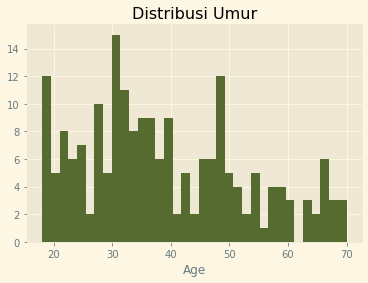

In [50]:
customers.hist('Age', bins=35, color = 'darkolivegreen')
plt.title('Distribusi Umur')
plt.xlabel('Age')

#Visualisasi data untuk distribusi umur dengan bins 35 dikarenakan mengambil nilai tengah 0-70
#berdasarkan grafik dapat kita lihat bahwa pengunjung mall terbanyak berumur diantara 30 - 33

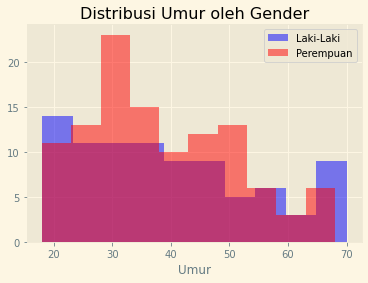

In [51]:
plt.hist('Age', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Laki-Laki', color = 'blue')
plt.hist('Age', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Perempuan', color ='red')
plt.title('Distribusi Umur oleh Gender')
plt.xlabel('Umur')
plt.legend()

#Visualisasi data dengan histogram melihat distribusi umur pengunjung mall berdasarkan gendernya
#dapat dilihat bahwa perempuan dengan umur diatas 30 mendominasi sebagai pengunjung terbanyak
#sedangkan pengunjung yang sedikit adalah laki-laki dan perempuan berumur diantara 59-65 tahun

Text(0.5, 0, 'Ribu Dollar')

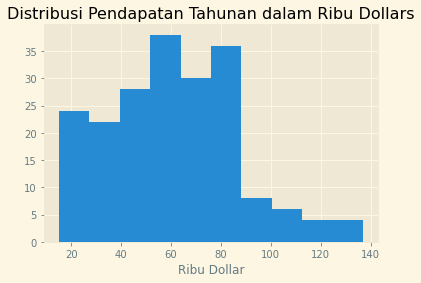

In [52]:
customers.hist('Annual Income (k$)')
plt.title('Distribusi Pendapatan Tahunan dalam Ribu Dollars')
plt.xlabel('Ribu Dollar')

#visualisasi data untuk distribusi pendapatan tahunan
#distribusi pendapatan terbesar berada di kisaran 60 hingga 80 ribu dollar

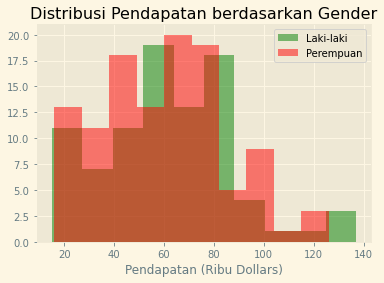

In [53]:
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Laki-laki', color = 'green')
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Perempuan', color = 'red')
plt.title('Distribusi Pendapatan berdasarkan Gender')
plt.xlabel('Pendapatan (Ribu Dollars)')
plt.legend()

#apakah gender mempengaruhi pendapatan? maka dari itu kita mencari distribusinya
#berdasarkan tabel di bawah dapat terlihat bahwa pendapatan lebih banyak oleh laki-laki dibandingkan perempuan
#Pendapatan perempuan terbesar berada di kisaran 60-80 ribu dollar

Text(0.5, 0, 'Skor')

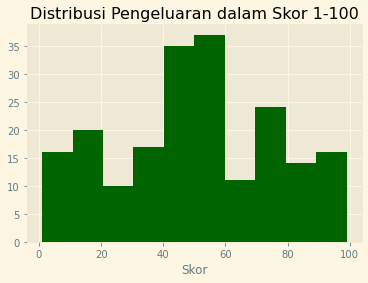

In [54]:
customers.hist('Spending Score (1-100)', color = 'darkgreen')
plt.title('Distribusi Pengeluaran dalam Skor 1-100')
plt.xlabel('Skor')

#visualisasi data untuk distribusi pengeluaran dalam skor 1 sampai 100
#distribusi pendapatan terbesar berada di kisaran skor 40-60

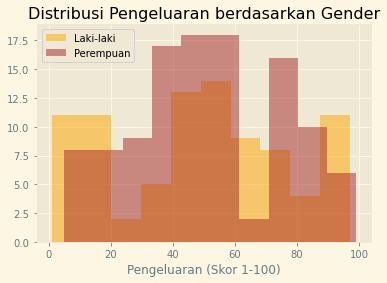

In [55]:
plt.hist('Spending Score (1-100)', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Laki-laki', color = 'orange')
plt.hist('Spending Score (1-100)', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Perempuan', color = 'brown')
plt.title('Distribusi Pengeluaran berdasarkan Gender')
plt.xlabel('Pengeluaran (Skor 1-100)')
plt.legend()

#apakah gender mempengaruhi pengeluaran? maka dari itu kita mencari distribusinya
#berdasarkan tabel di bawah dapat terlihat bahwa pengeluaran lebih banyak oleh perempuan dibandingkan laki-laki
#Pendapatan perempuan terbesar berada di kisaran skor 60-80 

In [56]:
#kita memisahkan customer perempuan dan laki-laki
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

#selanjutnya kita mencari rata-rata pengeluaran dari keduanya
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

#dapat dilihat bahwa rata-rata pengeluaran perempuan yang terbesar dibandingkan laki-laki

48.51136363636363
51.526785714285715


In [57]:
Seg = customers.iloc[:, [3,4]].values

#untuk melihat segmentasi, kita memisahkan data yang akan di segmenkan
#kita menggunakan data pendapatan dan pengeluaran

print(Seg)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

C:\Users\win 10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


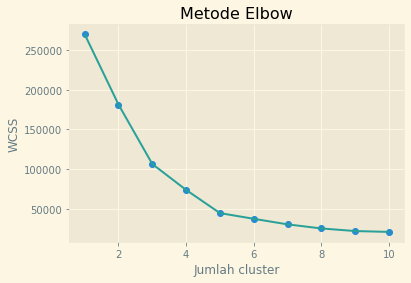

In [58]:
wcss = [] #menentukan nilai wcss
for n in range(1, 11): #range dengan looping 10 kali, jika 20 kali dengan range 22
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 0) 
    #n_cluster adalah jumlah cluster, init adalah jumlah K yang dipilih.
    #kita menggunakan k-means++ karena menghindari jebakan centroid
    #random state adalah jika kita memilih 0 di kesempatan berbeda maka bilangan random akan sama
    kmeans.fit(Seg)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, 'o')
plt.plot(range(1, 11), wcss, '-')
plt.title('Metode Elbow')
plt.xlabel('Jumlah cluster')
plt.ylabel('WCSS')
plt.show()

In [24]:
#membuat model K-Means
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(Seg)
#untuk unsupervised learning kita gunakan "fit_predict()" sedangkan untuk supervised learning menggunakan "fit_tranform()

In [25]:
print(y_kmeans)
#untuk lebih simpel kita convert ke bentuk data frame atau tabel
df_kmeans = pd.DataFrame(y_kmeans)
df_kmeans.head(10)

#array/data frame di bawah memiliki arti yaitu pengunjung 1 masuk ke cluster 5 (karena 0 adalah 1 dan 4 adalah 5) dst

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


,0
0,4
1,3
2,4
3,3
4,4
5,3
6,4
7,3
8,4
9,3


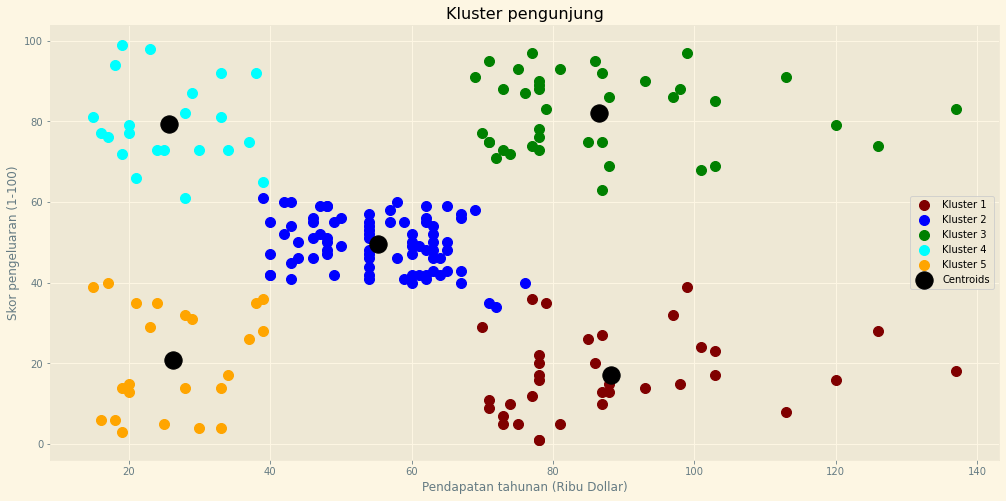

In [26]:
# Visualisasi hasil clusters
plt.figure(1 , figsize = (17 , 8))
plt.scatter(Seg[y_kmeans == 0, 0], #sumbu x atau 0 dengan kluster 0 atau 1
            Seg[y_kmeans == 0, 1], #sumbu y atau 1 dengan kluster 0 atau 1
            s = 100, #size adalah 100
            c = 'maroon', #warna pola plot
            label = 'Kluster 1') #nama dari plot
plt.scatter(Seg[y_kmeans == 1, 0], Seg[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Kluster 2')
plt.scatter(Seg[y_kmeans == 2, 0], Seg[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Kluster 3')
plt.scatter(Seg[y_kmeans == 3, 0], Seg[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Kluster 4')
plt.scatter(Seg[y_kmeans == 4, 0], Seg[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Kluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Kluster pengunjung')
plt.xlabel('Pendapatan tahunan (Ribu Dollar)')
plt.ylabel('Skor pengeluaran (1-100)')
plt.legend()
plt.show()

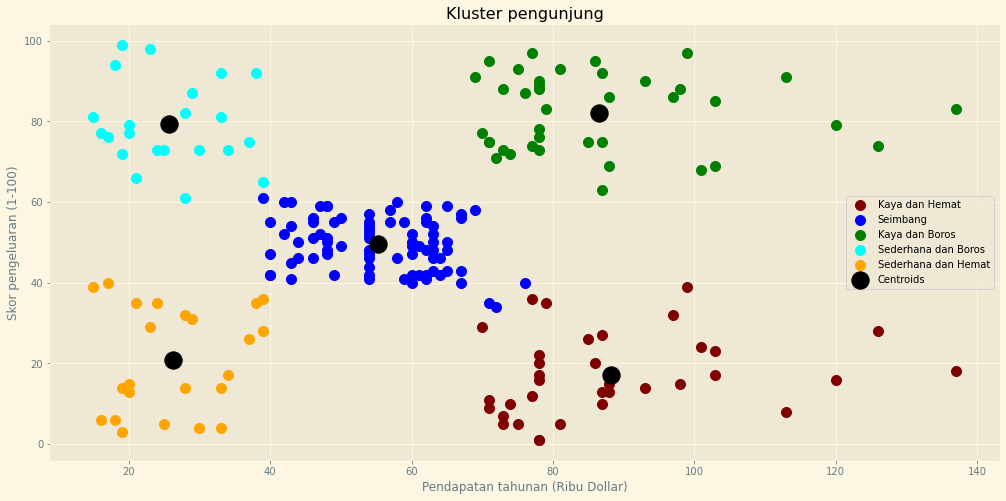

In [27]:
#visualisasi dengan lebih simpel
plt.figure(1 , figsize = (17 , 8))
plt.scatter(Seg[y_kmeans == 0, 0], Seg[y_kmeans == 0, 1], s = 100, c = 'maroon', label = 'Kaya dan Hemat')
plt.scatter(Seg[y_kmeans == 1, 0], Seg[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Seimbang')
plt.scatter(Seg[y_kmeans == 2, 0], Seg[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Kaya dan Boros')
plt.scatter(Seg[y_kmeans == 3, 0], Seg[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Sederhana dan Boros')
plt.scatter(Seg[y_kmeans == 4, 0], Seg[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Sederhana dan Hemat')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Kluster pengunjung')
plt.xlabel('Pendapatan tahunan (Ribu Dollar)')
plt.ylabel('Skor pengeluaran (1-100)')
plt.legend()
plt.show()